# $1.$ Dataset Preparation 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## $a.$ Defining and preparing class variables (1 pt)

#### We aim to utilize our dataset to predict level of diabetes in a patient, (e.g. no diabetes, prediabetes, diabetes). Each patient was asked 21 questions regarding his/her health, habits, education, and income history. Although we have the same data type (float64) for each of our features, based on the documentation on Kaggle, we do have 4 distinct categorical features:

#### $GenHlth, Age, Education, and Income.$

#### Each category is described as follows:

##### $Diabetes 012 - Diabetes Scale$

                            0 = No Diabetes

                            1 = Prediabetes
                            
                            2 = Diabetes


##### $GenHlth - General Health$

                            1 = Excellent
                            
                            2 = Very Good
                            
                            3 = Good
                            
                            4 = Fair
                            
                            5 = Poor

##### $Age - Age Category$

                            1 = 18 - 24 yrs
                            2 = 25 - 29 yrs
                            3 = 30 - 34 yrs
                            4 = 35 - 39 yrs
                            5 = 40 - 44 yrs
                            6 = 45 - 49 yrs
                            7 = 50 - 54 yrs
                            8 = 55 - 59 yrs
                            9 = 60 - 64 yrs
                            10 = 65 - 69 yrs
                            11 = 70 - 74 yrs
                            12 = 75 - 79 yrs
                            13 = 80 yrs or older

##### $Education - Education Level$

                            1 = Never attended school or only kindergarten
                            
                            2 = Grades 1 through 8 (Elementary)
                            
                            3 = Grades 9 through 11 (Some high school)
                            
                            4 = Grade 12 or GED (High school graduate)
                            
                            5 = College 1 year to 3 years (Some college or technical school)
                            
                            6 = College 4 years or more (College graduate)
                            
##### $Income - Income Scale$

                            1 = less than $10,000
                          
                            2 = less than $15,000, more than $10,000
                            
                            3 = less than $20,000, more than $15,000
                            
                            4 = less than $25,000, more than $20,000
                            
                            5 = less than $35,000, more than $25,000
                            
                            6 = less than $50,000, more than $35,000
                            
                            7 = less than $75,000, more than $75,000
                            
                            8 = more than $75,000

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
# ========================================================
from copy import deepcopy
df_target = deepcopy(df)
# ========================================================
df_target.drop(df_target.tail(247000).index,inplace = True) # lets keep the entire dataset for now

print(df_target.info())

#show df
pd.set_option('display.max_columns', None)
df_target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          6680 non-null   float64
 1   HighBP                6680 non-null   float64
 2   HighChol              6680 non-null   float64
 3   CholCheck             6680 non-null   float64
 4   BMI                   6680 non-null   float64
 5   Smoker                6680 non-null   float64
 6   Stroke                6680 non-null   float64
 7   HeartDiseaseorAttack  6680 non-null   float64
 8   PhysActivity          6680 non-null   float64
 9   Fruits                6680 non-null   float64
 10  Veggies               6680 non-null   float64
 11  HvyAlcoholConsump     6680 non-null   float64
 12  AnyHealthcare         6680 non-null   float64
 13  NoDocbcCost           6680 non-null   float64
 14  GenHlth               6680 non-null   float64
 15  MentHlth             

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,13.0,6.0,6.0
6676,2.0,1.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,10.0,1.0,1.0,11.0,6.0,8.0
6677,0.0,1.0,1.0,1.0,22.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,13.0,6.0,6.0
6678,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,6.0


###### Checking for missing values

In [3]:
if df_target.isnull().sum().any() == False:
    print('There are no missing values')
else:
    print('There are missing values')

There are no missing values


###### Encoding categorical features, normalizing numerical variables, and converting binary variables to integers

In [4]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
# ========================================================
df_encode = deepcopy(df_target)
# ========================================================
# for every categorical variable, encode as integer
# Keras will use the integer variable to figure out how to one-hot encode    
encoders = dict() # save each encoder in dictionary
categorical_headers = ['Diabetes_012', 'GenHlth','Age','Education','Income']

for col in categorical_headers:
        encoders[col] = LabelEncoder() # save the encoder
        df_encode[col] = encoders[col].fit_transform(df_encode[col])
# ========================================================
# scale the numeric, continuous variables
numerical_headers = ["BMI", "MentHlth", "PhysHlth"]

for col in numerical_headers:
    ss = StandardScaler()
    df_encode[col] = ss.fit_transform(df_encode[col].values.reshape(-1,1))
# ========================================================
# converting binary variables to integers
binary_headers = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
                  'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex',]
for col in binary_headers:
    df_encode[col] = df_encode[col].astype('int64')
    
print(df_encode.info())
df_encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          6680 non-null   int64  
 1   HighBP                6680 non-null   int64  
 2   HighChol              6680 non-null   int64  
 3   CholCheck             6680 non-null   int64  
 4   BMI                   6680 non-null   float64
 5   Smoker                6680 non-null   int64  
 6   Stroke                6680 non-null   int64  
 7   HeartDiseaseorAttack  6680 non-null   int64  
 8   PhysActivity          6680 non-null   int64  
 9   Fruits                6680 non-null   int64  
 10  Veggies               6680 non-null   int64  
 11  HvyAlcoholConsump     6680 non-null   int64  
 12  AnyHealthcare         6680 non-null   int64  
 13  NoDocbcCost           6680 non-null   int64  
 14  GenHlth               6680 non-null   int64  
 15  MentHlth             

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,1.697640,1,0,0,0,0,1,0,1,0,4,1.800337,1.092141,1,0,8,3,2
1,0,0,0,0,-0.622913,1,0,0,1,0,0,0,0,1,2,-0.464423,-0.524483,0,0,6,5,0
2,0,1,1,1,-0.158803,0,0,0,0,1,0,0,1,1,4,3.310176,2.708765,1,0,8,3,7
3,0,1,0,1,-0.313506,0,0,0,1,1,1,0,1,0,1,-0.464423,-0.524483,0,0,10,2,5
4,0,1,1,1,-0.777617,0,0,0,1,1,1,0,1,0,1,-0.086963,-0.524483,0,0,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,0,1,0,1,-0.004099,0,0,0,1,1,1,1,1,0,3,-0.464423,-0.524483,0,1,12,5,5
6676,2,1,0,1,-0.004099,1,0,0,1,0,0,0,1,0,2,-0.212783,0.553266,1,1,10,5,7
6677,0,1,1,1,-1.087024,1,0,1,1,1,0,0,1,1,1,-0.464423,-0.524483,0,1,12,5,5
6678,0,0,1,1,-0.777617,1,0,0,1,1,1,0,1,0,1,-0.464423,-0.524483,0,0,10,5,5


#### As evident above, our integer encoded features are stored as int64 datatypes and our continuous numerical variables are stored as float64. Once again, we will be grappling with a multi-class classification problem. Since keras can one-hot encode on its own when given integer encoded variables, we simply integer encode the target column as we did with the other categorical features. This will also be useful in our data splitting method, since the method we intend to implement cannot work with one-hot encoded variables that produce multi-label indicator target types.

###### Defining features and target

In [5]:
target = ['Diabetes_012']
X = df_encode.drop(target, axis=1); y = df_encode.Diabetes_012

In [6]:
# Features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                6680 non-null   int64  
 1   HighChol              6680 non-null   int64  
 2   CholCheck             6680 non-null   int64  
 3   BMI                   6680 non-null   float64
 4   Smoker                6680 non-null   int64  
 5   Stroke                6680 non-null   int64  
 6   HeartDiseaseorAttack  6680 non-null   int64  
 7   PhysActivity          6680 non-null   int64  
 8   Fruits                6680 non-null   int64  
 9   Veggies               6680 non-null   int64  
 10  HvyAlcoholConsump     6680 non-null   int64  
 11  AnyHealthcare         6680 non-null   int64  
 12  NoDocbcCost           6680 non-null   int64  
 13  GenHlth               6680 non-null   int64  
 14  MentHlth              6680 non-null   float64
 15  PhysHlth             

In [7]:
# Targets
from sklearn.utils.multiclass import type_of_target
print('For our classification task we have a total of: ', len(np.unique(y)), ' classes\n\nThus we have a ' + str(type_of_target(y)) + ' target.')
print(y)

For our classification task we have a total of:  3  classes

Thus we have a multiclass target.
0       0
1       0
2       0
3       0
4       0
       ..
6675    0
6676    2
6677    0
6678    0
6679    0
Name: Diabetes_012, Length: 6680, dtype: int64


## $b.$ Identifying cross-product features (1 pt)

#### To determine potential candidates for cross-product feature pairing, we decided to generate a correlation matrix that exhibits how well-correlated certain features are to one another in our dataset. 

<AxesSubplot:>

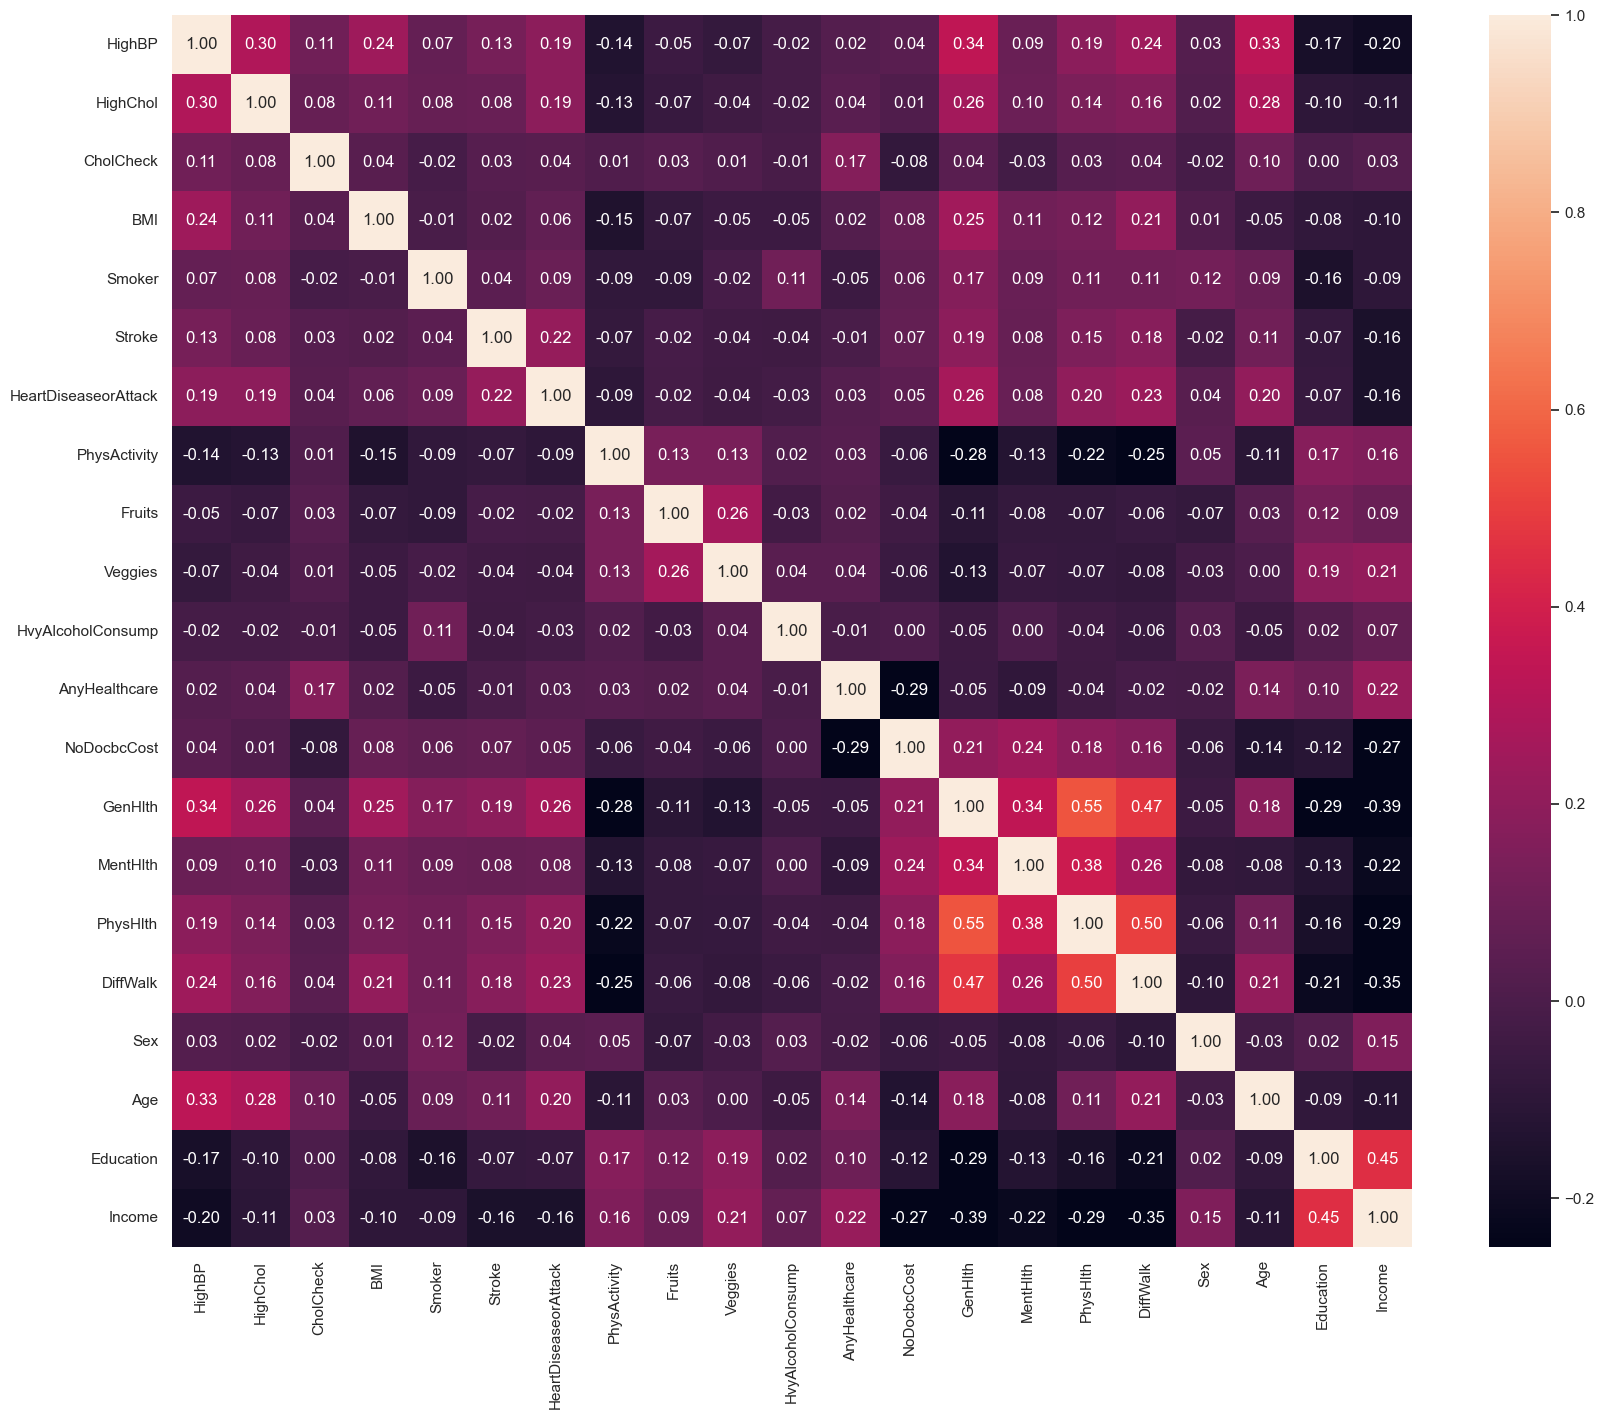

In [8]:
import seaborn as sns
 
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

# f, ax = plt.subplots(figsize=(15, 15))
fig = plt.figure(figsize=(20,16))
sns.heatmap(X.corr(), cmap=cmap, annot=True, vmin=-0.25, vmax=1, fmt=".2f")

In [9]:
categorical_headers = ['GenHlth','Age','Education','Income']
for col in categorical_headers:
    vals = X[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

GenHlth has 5 unique values:
[4 2 1 3 0]
Age has 13 unique values:
[ 8  6 10  9  7 12  3  5  1 11  4  0  2]
Education has 6 unique values:
[3 5 2 4 1 0]
Income has 8 unique values:
[2 0 7 5 3 6 1 4]


In [10]:
%%time
cross_columns = [['Education','Income'],
                 ['Education', 'Income', 'Age'],
                 ['PhysHlth', 'DiffWalk'],
                 ['MentHlth', 'PhysHlth'],
                 ['GenHlth', 'DiffWalk'],
                 ['GenHlth', 'PhysHlth'],
                 ['GenHlth', 'PhysHlth', 'MentHlth'],
                 ['GenHlth', 'PhysHlth', 'DiffWalk']]

cross_col_df_names= []
for cols_list in cross_columns:
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed = X[cols_list].astype(str).agg('_'.join, axis=1)
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(X_crossed)
    
    # 3. Save into dataframe with new name
    X[cross_col_name] = enc.transform(X_crossed)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name)

X.head()

CPU times: total: 281 ms
Wall time: 277 ms


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Education_Income,Education_Income_Age,PhysHlth_DiffWalk,MentHlth_PhysHlth,GenHlth_DiffWalk,GenHlth_PhysHlth,GenHlth_PhysHlth_MentHlth,GenHlth_PhysHlth_DiffWalk
0,1,1,1,1.697640,1,0,0,0,0,1,0,1,0,4,1.800337,1.092141,1,0,8,3,2,21,188,29,205,9,100,596,170
1,0,0,0,-0.622913,1,0,0,1,0,0,0,0,1,2,-0.464423,-0.524483,0,0,6,5,0,35,365,8,55,4,42,236,67
2,1,1,1,-0.158803,0,0,0,0,1,0,0,1,1,4,3.310176,2.708765,1,0,8,3,7,26,253,56,283,9,111,653,189
3,1,0,1,-0.313506,0,0,0,1,1,1,0,1,0,1,-0.464423,-0.524483,0,0,10,2,5,16,123,8,55,2,22,104,34
4,1,1,1,-0.777617,0,0,0,1,1,1,0,1,0,1,-0.086963,-0.524483,0,0,10,4,3,30,295,8,4,2,22,101,34


#### When determining which features to cross, we decided to set a correlation threshold of 0.35. This is an arbitrary metric implemented after analyzing the matrix. We concluded that MentHlth and PhyHlth should definitely be crossed due to one's affect on another and vice versa. Their correlation was 0.35, as a result this is what we chose as the threshold. We found 4 other pairs of features that surpassed this value (see above). Moreover, we chose to append Age to Education and Income because it is obvious that, as people get older, their education levels and income tend to increase. We also decided to append MentHlth to the GenHlth and PhysHlth pair because it surpasses the threshold mark with each of the aforementioned features. We followed the same approach with DiffWalk.

## $c.$ Choosing evaluation metric (1 pt)

#### To determine the type of evaluation metric to implement we will quantify the class imbalance in our target feature Diabetes_012.

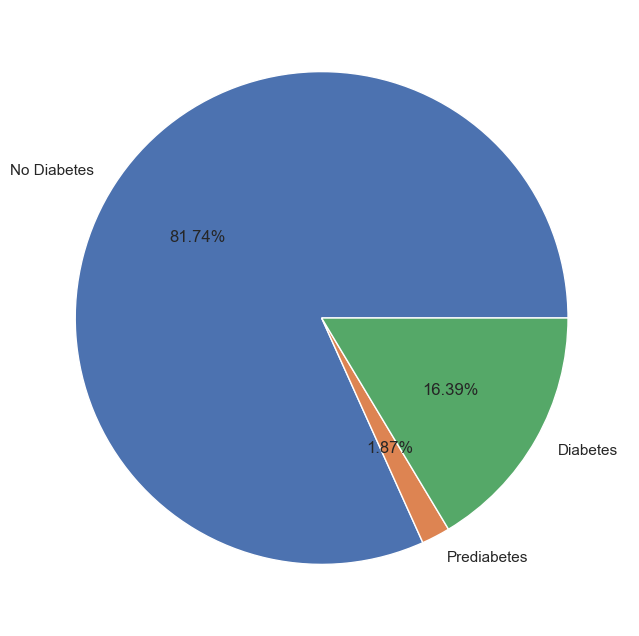

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.pie(np.bincount(y), labels=['No Diabetes', 'Prediabetes', 'Diabetes'], autopct='%.2f%%')
plt.show()

#### We conclude that we are dealing with a relatively large class imbalance. As a result, we decided to implement the F1-score evaluation metric. The class imbalance is a problem for other evaluation metrics such as accuracy because, on any random guess the model would still be correct most of the time (84% of the time in our case). This metric is also essential for the task at hand in any deployment of this model because, based on the World Health Organization (WHO), in 2014 8.4% of adults aged 18 years or older were diagnosed with diabetes. As a result, any survey that collects responses from a random grouping of people will tend to lean toward this imbalance in their responses as well. Therefore, consistently generating datasets that would be characterized by dramatic class imbalances. Interestingly, we actually see a slightly higher percentage in those who have been diagnosed with diabetes in our respective dataset. The responses for the survey used to produce this dataset were from the year 2015 and the respondents were randomly chosen. 

## $d.$ Choosing method to split data into test and training sets (1 pt)

Size of training set for each class:  [4368  100  876] and for test set is:  [1092   25  219]


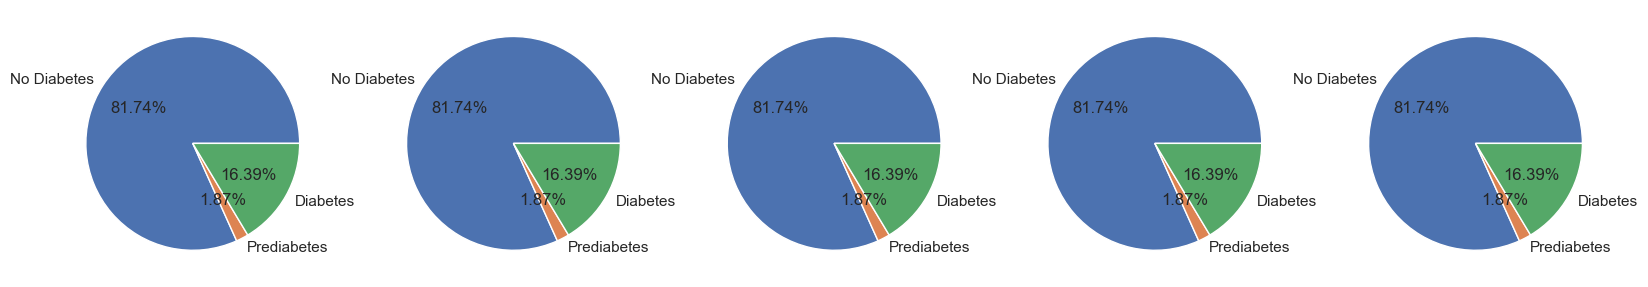

In [12]:
from sklearn.model_selection import StratifiedKFold
K = 5
skfold = StratifiedKFold(n_splits=K, random_state=1, shuffle=True)

fig = plt.figure(figsize=(20, 8))

i = 1
for train_idx, test_idx in skfold.split(X, y):
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    ax = fig.add_subplot(1,K,i)
    plt.pie(np.bincount(y_train), labels=['No Diabetes', 'Prediabetes', 'Diabetes'], autopct='%.2f%%')
    i += 1
print('Size of training set for each class: ', np.bincount(y_train), 'and for test set is: ', np.bincount(y_test))

#### To split our dataset, we chose to implement a stratified K-fold approach due to the inherent class imbalance. Also, due to how large our dataset is, we concluded that a 80/20 split would suffice between our training and test set, therefore we decided to utilize 5 folds. As seen above, we have mitigated the predicaments otherwise evident in randomly splitting the data insofar that we maintain the ratio between our multi-class features seen in the complete dataset (i.e., the ratio between No Diabetes/Diabetes, PreDiabetes/No Diabetes, and Prediabetes/Diabetes within each fold is the same as what we see in the original dataset -- See "Choosing evaluation metric").

# $2.$ Modeling

## $a.$ Creating three combined wide and deep networks (2 pts)

In [13]:
#TODO - make working changes to model.compile
#TODO - describe first model
#TODO - for second model, add more dense layers for wide etc
#TODO - for third model, add more dense layers for deep etc

#QUESTION - do we include binary features as categorical?
#QUESTION - this is not binary classifier, so which optimizer and loss do we use? "categorical_crossentropy" doesn't work

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input, Embedding, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

# F1-score is no longer supported in keras so we must make a F1-score function
# From https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d

def f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

### Create first deep and wide network

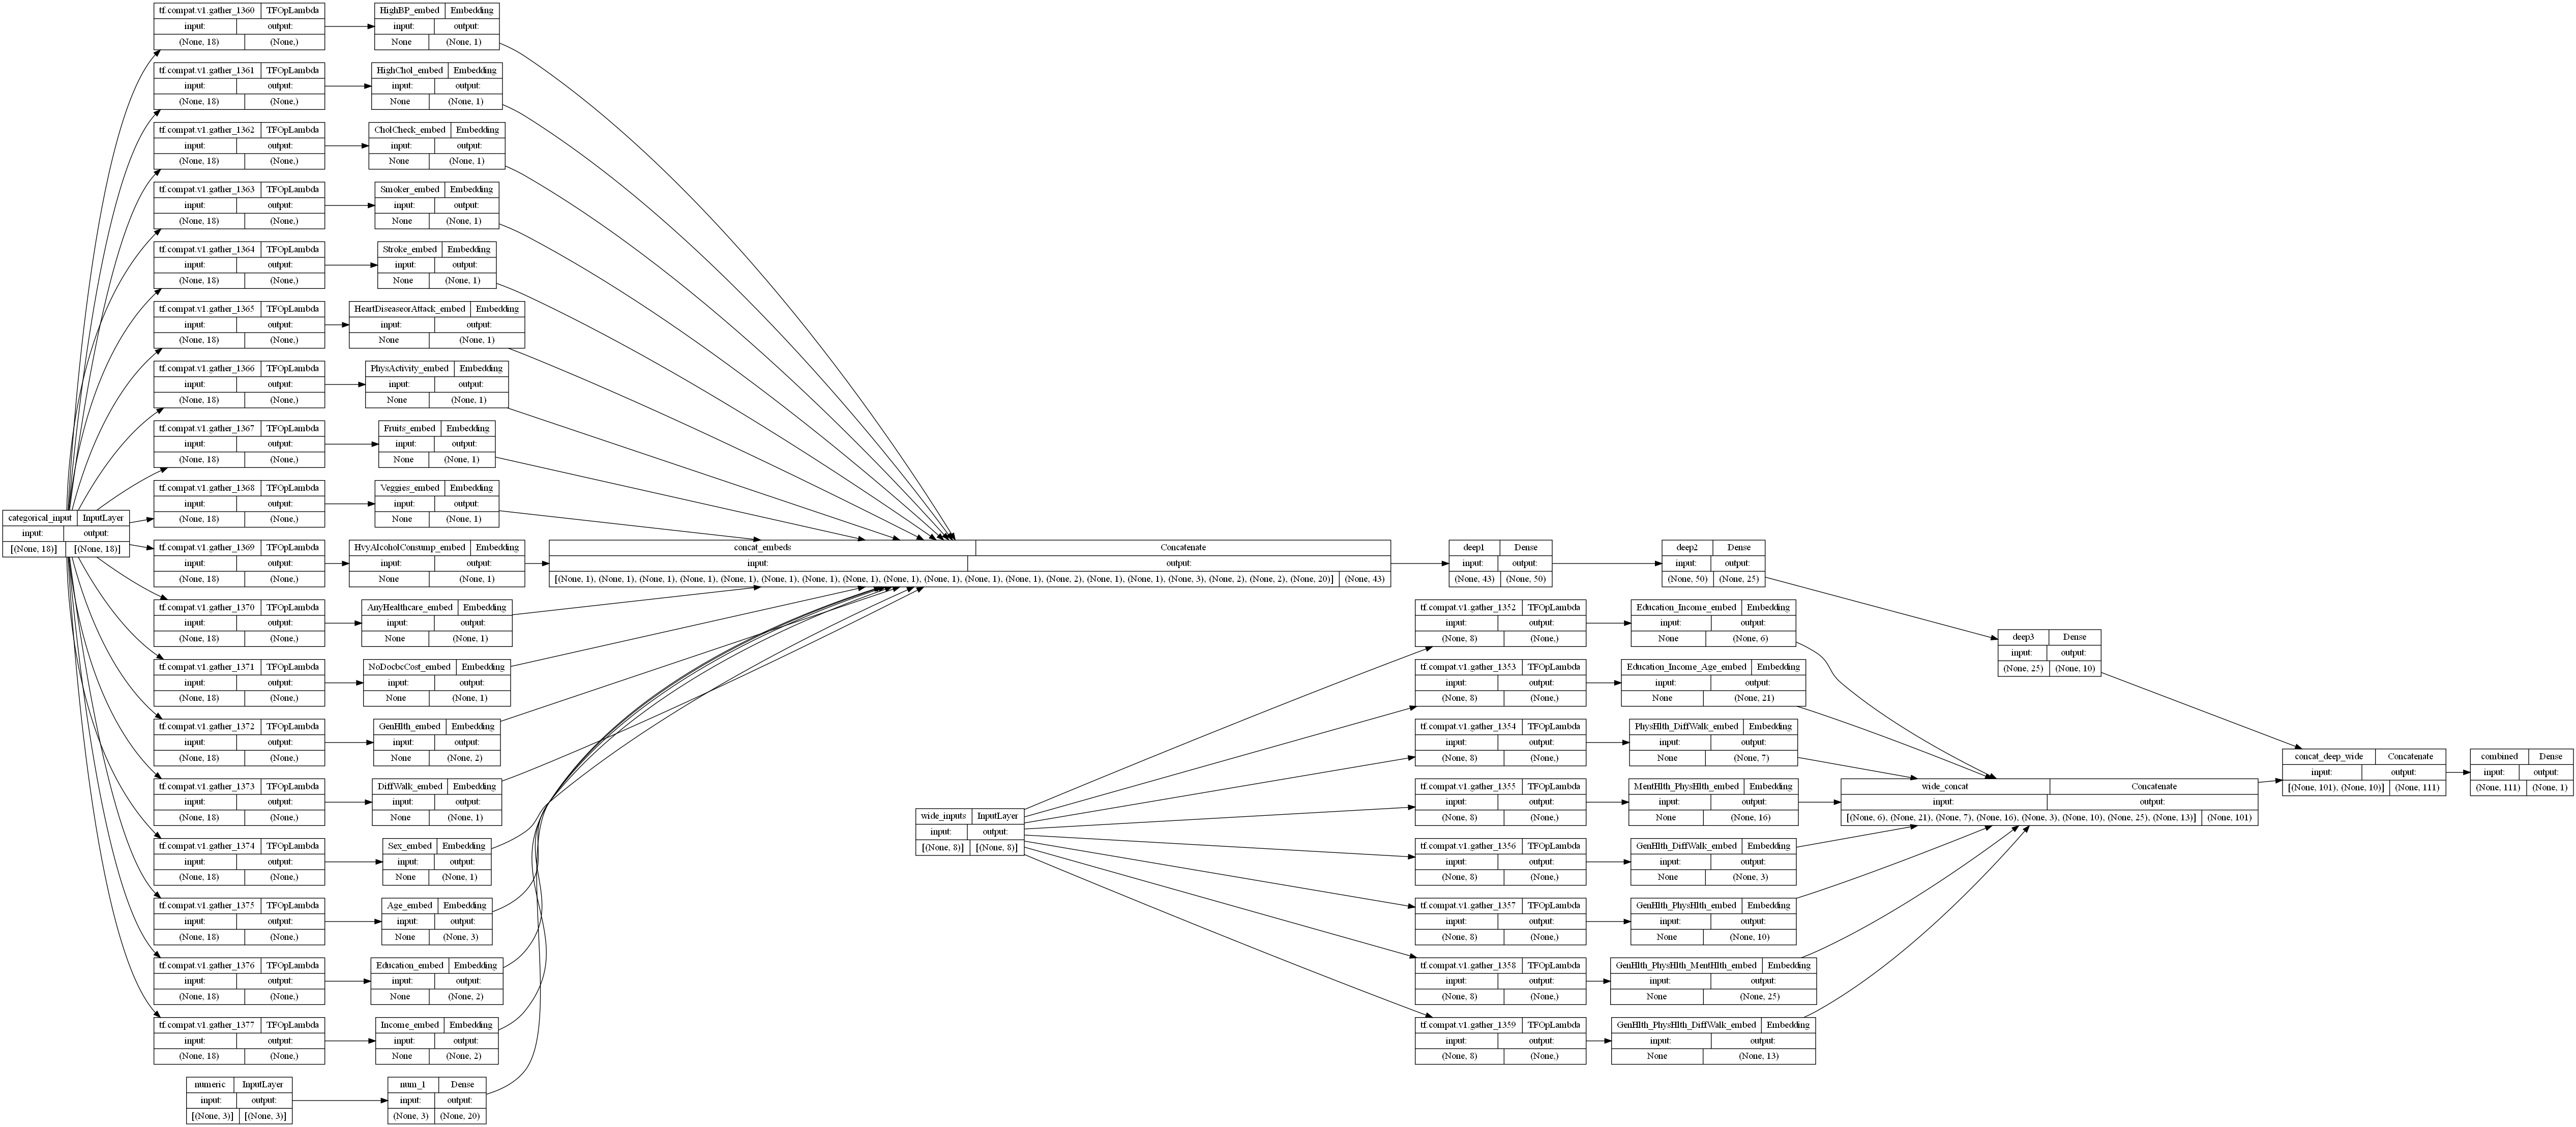

Fold 1 - Loss: 1.4927369356155396 F1-Score: 0.4542895257472992


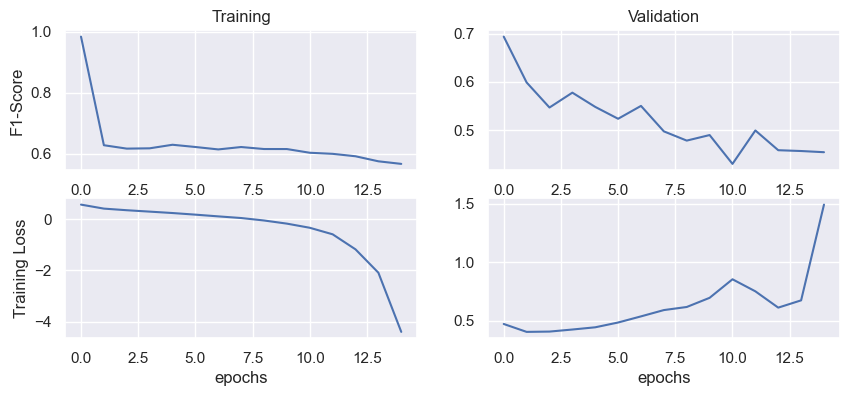

Fold 2 - Loss: 1.2241411209106445 F1-Score: 0.4551628530025482


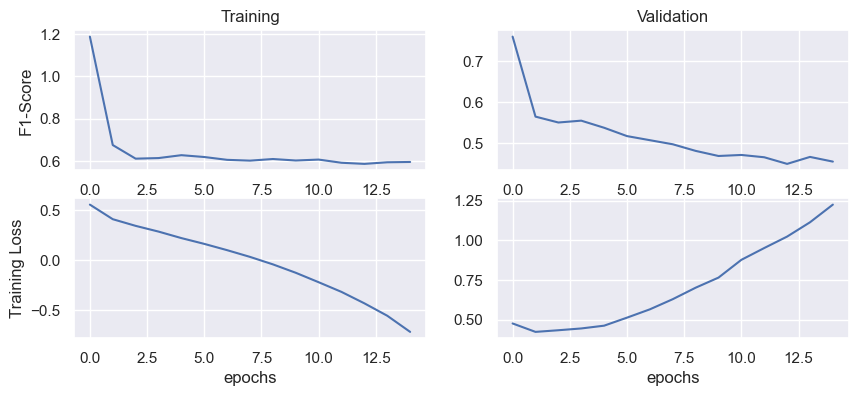

Fold 3 - Loss: 0.803200364112854 F1-Score: 0.4556383490562439


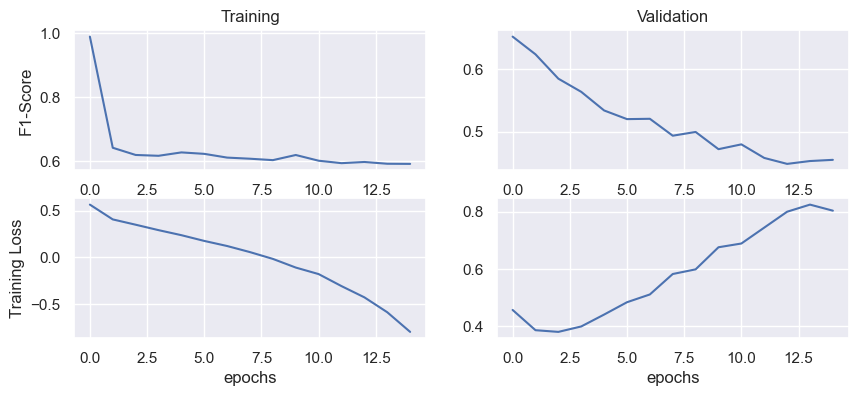

Fold 4 - Loss: 1.1156413555145264 F1-Score: 0.464952290058136


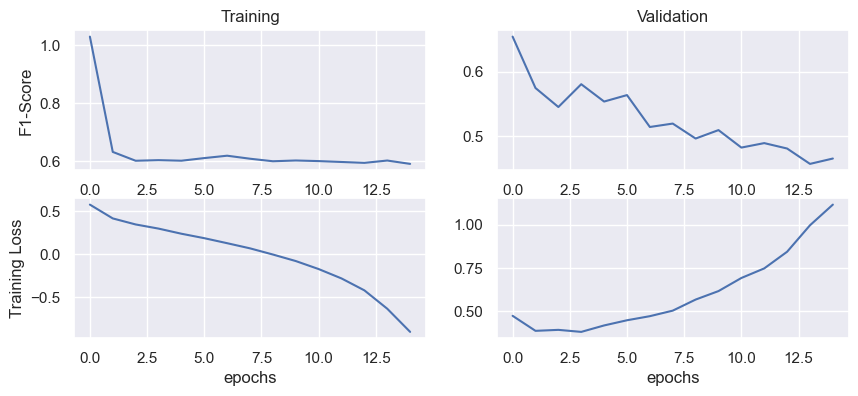

Fold 5 - Loss: 5.700728416442871 F1-Score: 0.434181809425354


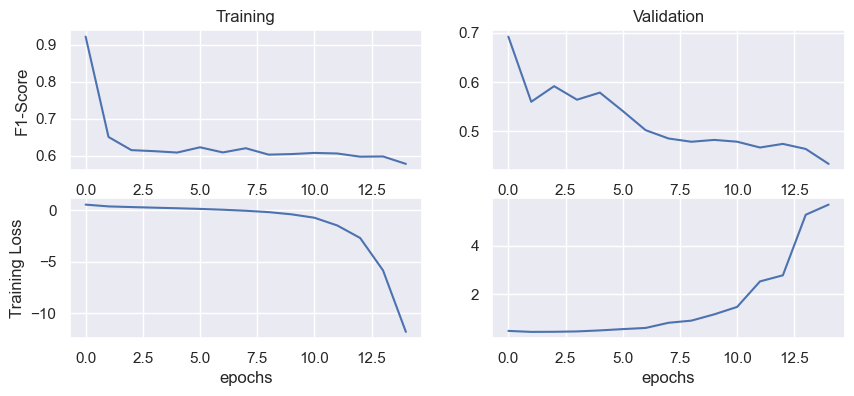

Average loss: 2.067289638519287
Average F1-Score: 0.45284496545791625


In [30]:
# Adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/10.%20Keras%20Wide%20and%20Deep.ipynb

categorical_headers = list(X.select_dtypes(include='int64').columns)

fold_count=1
f1_average=0
loss_average=0

#plotting vars
plotfilename = "firstwd.png"
plotted = False

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
    # get crossed columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()
    
    # save categorical features
    X_train_cat = X_train[categorical_headers].to_numpy() 
    X_test_cat = X_test[categorical_headers].to_numpy() 
    
    # and save off the numeric features
    X_train_num =  X_train[numerical_headers].to_numpy()
    X_test_num = X_test[numerical_headers].to_numpy()
    
    #we need to create separate lists for each branch
    crossed_outputs = []

    #CROSSED DATA INPUT
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
    for idx, col in enumerate(cross_col_df_names):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_crossed, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        crossed_outputs.append(x)
    
    #now concatenate the outputs and add a fully connected layer
    wide_branch = concatenate(crossed_outputs, name='wide_concat')
    
    #reset this input branch
    all_deep_branch_outputs = []
    
    #CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx, col in enumerate(categorical_headers):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N,
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
    
    #NUMERIC DATA INPUT
    #create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=20, activation='relu', name='num_1')(input_num)
    
    all_deep_branch_outputs.append(x_dense)
    
    #merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
    #merge the deep and wide branch
    final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    
    model = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[f1])
    
    if(plotted == False):
        display(plot_model(
        model, to_file=plotfilename, show_shapes=True, show_layer_names=True,
        rankdir='LR', expand_nested=True))
        plotted = True
    
    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=([X_test_crossed,X_test_cat,X_test_num],y_test))
    
    loss, f1_score = model.evaluate([X_test_crossed,X_test_cat,X_test_num], y_test, verbose=0)
    
    
    print(f'Fold {fold_count} - Loss: {loss} F1-Score: {f1_score}')
    fold_count+=1
    f1_average+=f1_score
    loss_average+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['f1'])
    
    plt.ylabel('F1-Score')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_f1'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()
    
print(f'Average loss: {loss_average/5}')
print(f'Average F1-Score: {f1_average/5}')

### Recreate wide and deep network by adding deep layers and a dropout layer

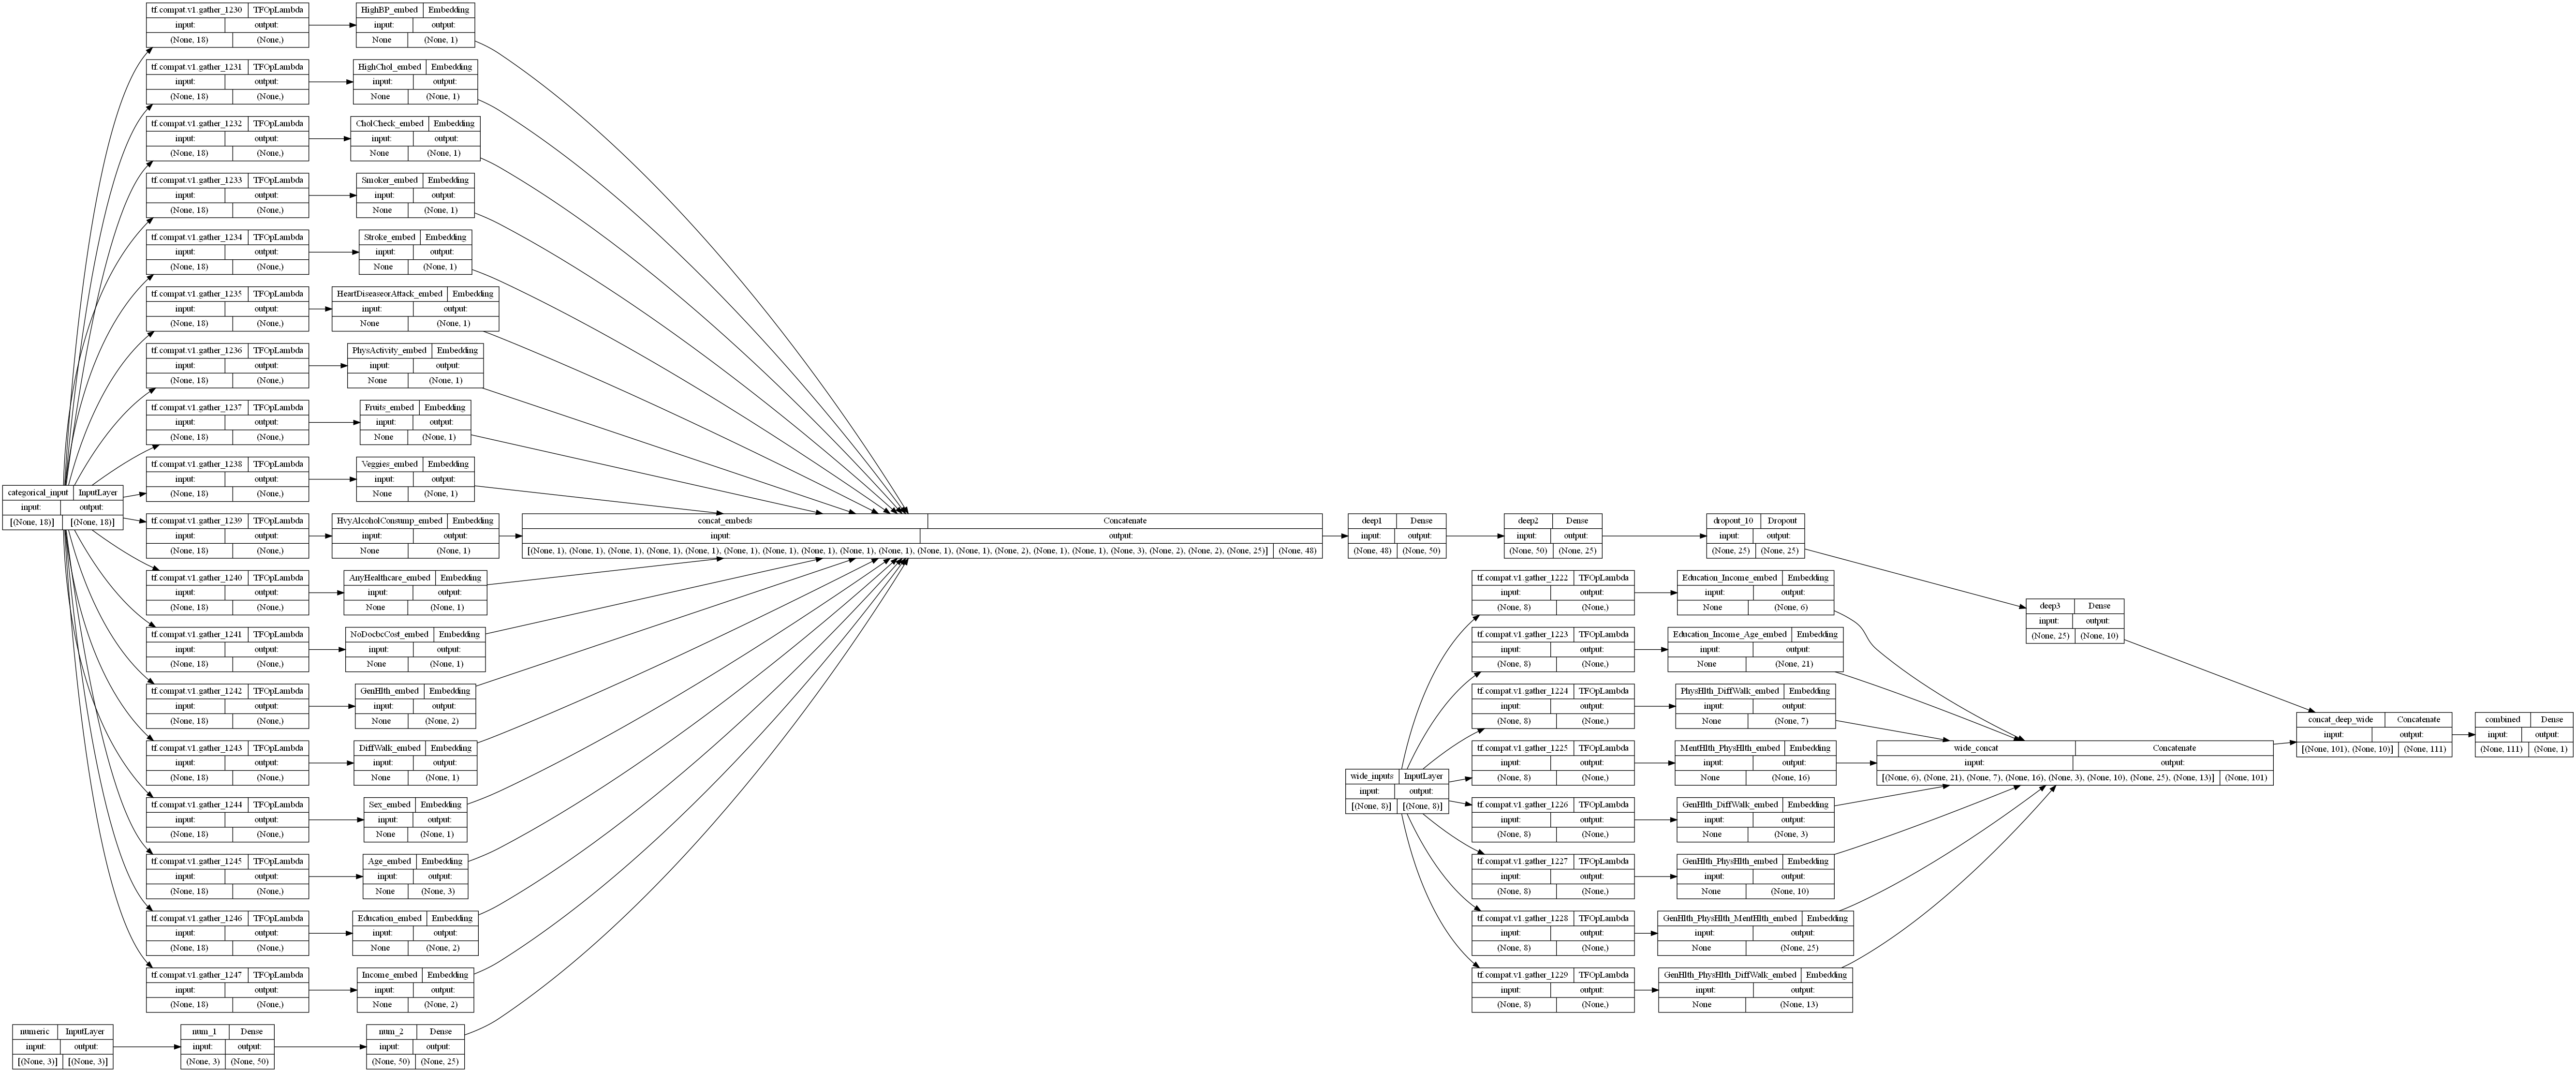

Fold 1 - Loss: 0.5601967573165894 F1-Score: 0.4479481279850006


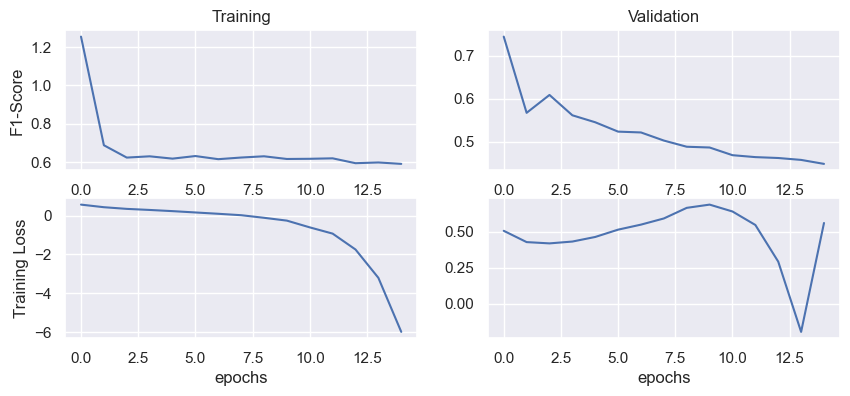

Fold 2 - Loss: -0.6118869781494141 F1-Score: 0.4444269835948944


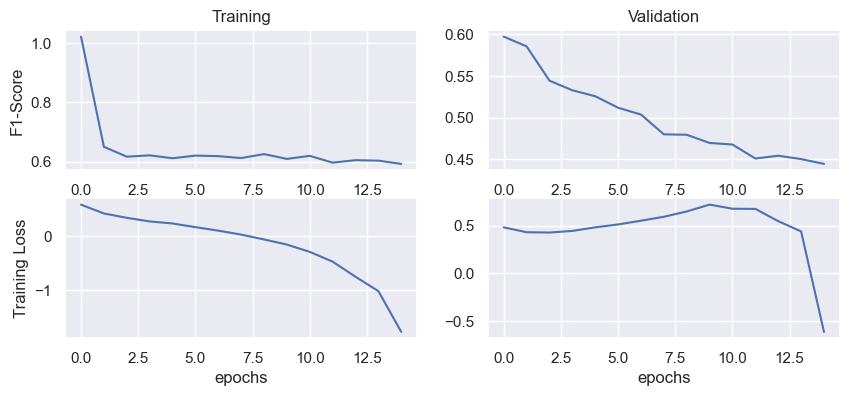

Fold 3 - Loss: 0.4361773133277893 F1-Score: 0.4913150370121002


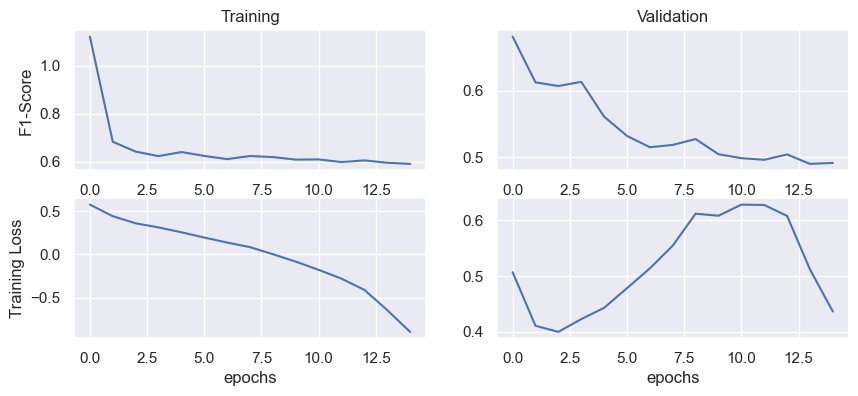

Fold 4 - Loss: 0.01815091259777546 F1-Score: 0.47279924154281616


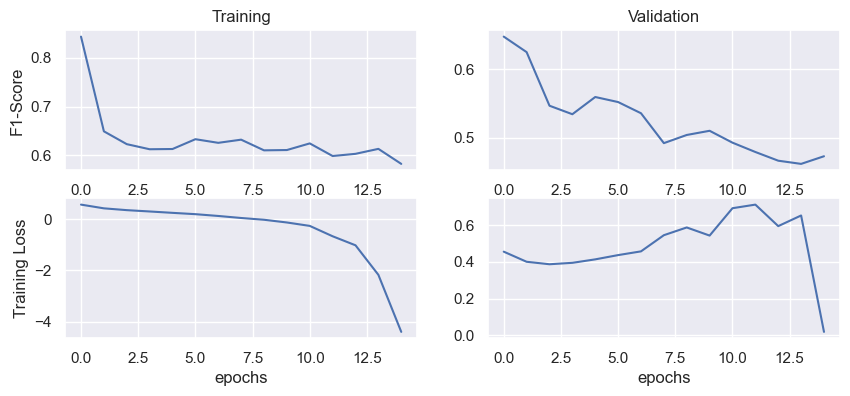

Fold 5 - Loss: 70.20418548583984 F1-Score: 0.43687888979911804


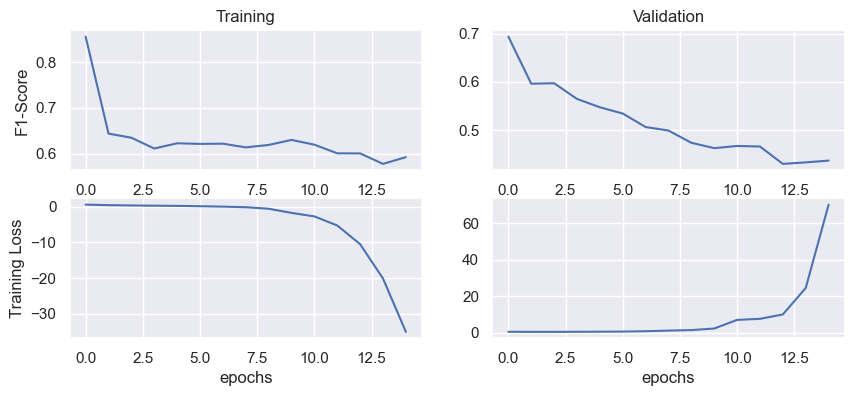

Average loss: 14.121364698186516
Average F1-Score: 0.4586736559867859


In [29]:
# Adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/10.%20Keras%20Wide%20and%20Deep.ipynb

fold_count=1
f1_average=0
loss_average=0

#plotting vars
plotfilename = "recreatewd_add_drop.png"
plotted = False

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
    # get crossed columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()
    
    # save categorical features
    X_train_cat = X_train[categorical_headers].to_numpy() 
    X_test_cat = X_test[categorical_headers].to_numpy() 
    
    # and save off the numeric features
    X_train_num =  X_train[numerical_headers].to_numpy()
    X_test_num = X_test[numerical_headers].to_numpy()
    
    #we need to create separate lists for each branch
    crossed_outputs = []

    #CROSSED DATA INPUT
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
    for idx, col in enumerate(cross_col_df_names):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_crossed, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        crossed_outputs.append(x)
    
    #now concatenate the outputs and add a fully connected layer
    wide_branch = concatenate(crossed_outputs, name='wide_concat')
    
    #reset this input branch
    all_deep_branch_outputs = []
    
    #CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx, col in enumerate(categorical_headers):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N,
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
    
    #NUMERIC DATA INPUT
    #create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=50, activation='relu', name='num_1')(input_num)
    x_dense = Dense(units=25, activation='relu', name='num_2')(x_dense)
    
    all_deep_branch_outputs.append(x_dense)
    
    #merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(0.35)(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
    #merge the deep and wide branch
    final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    
    model = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[f1])
    
    if(plotted == False):
        display(plot_model(
        model, to_file=plotfilename, show_shapes=True, show_layer_names=True,
        rankdir='LR', expand_nested=True))
        plotted = True
    
    
    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=([X_test_crossed,X_test_cat,X_test_num],y_test))
    
    loss, f1_score = model.evaluate([X_test_crossed,X_test_cat,X_test_num], y_test, verbose=0)
    
    print(f'Fold {fold_count} - Loss: {loss} F1-Score: {f1_score}')
    fold_count+=1
    f1_average+=f1_score
    loss_average+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['f1'])
    
    plt.ylabel('F1-Score')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_f1'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()
    
print(f'Average loss: {loss_average/5}')
print(f'Average F1-Score: {f1_average/5}')

### Recreate wide and deep network by adding layers to the wide branch

Fold 1 - Loss: 0.46685004234313965 F1-Score: 0.46220120787620544


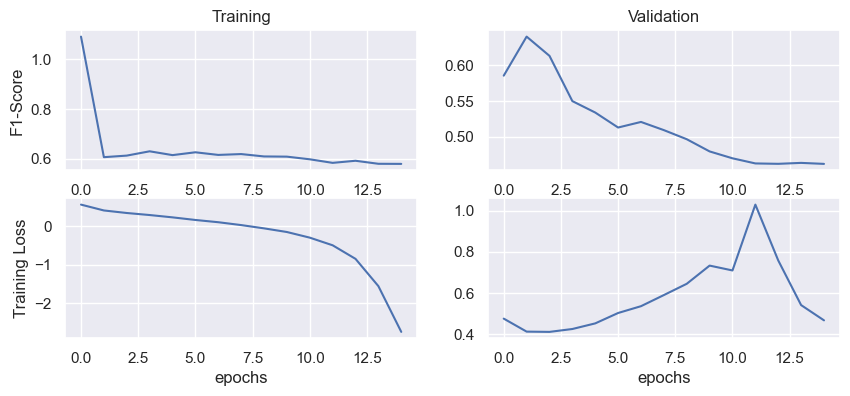

Fold 2 - Loss: 1.2492514848709106 F1-Score: 0.4618130326271057


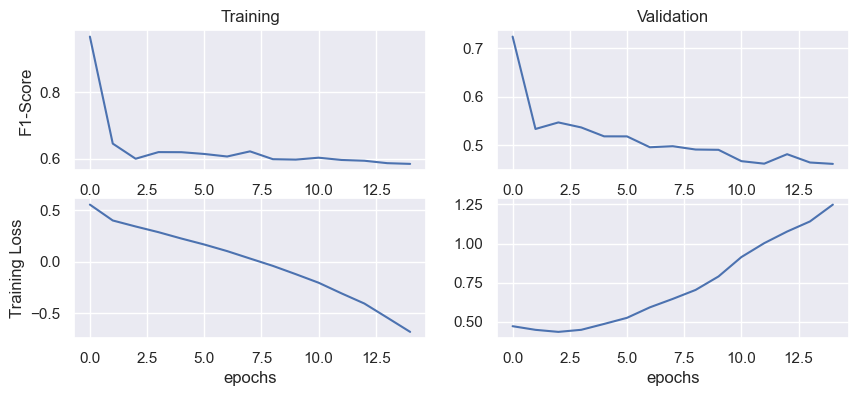

Fold 3 - Loss: 0.8376718163490295 F1-Score: 0.4745250344276428


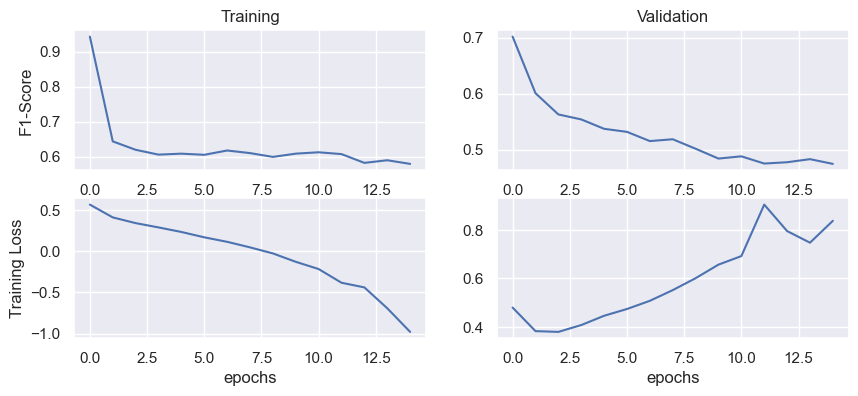

Fold 4 - Loss: 1.0212695598602295 F1-Score: 0.49101224541664124


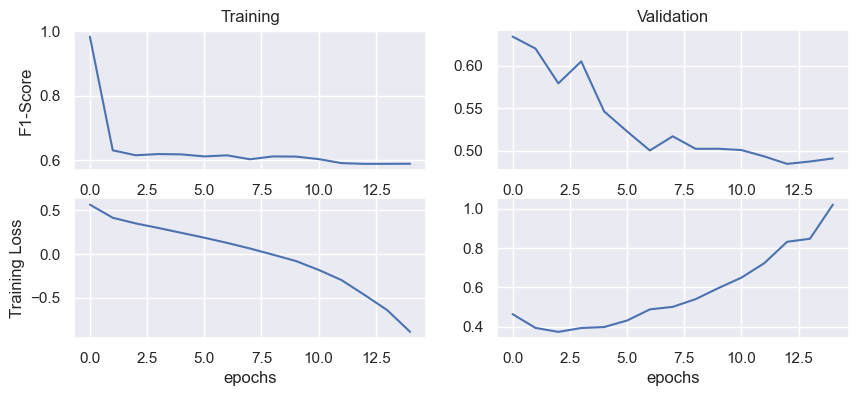

Fold 5 - Loss: 4.7975754737854 F1-Score: 0.4534209966659546


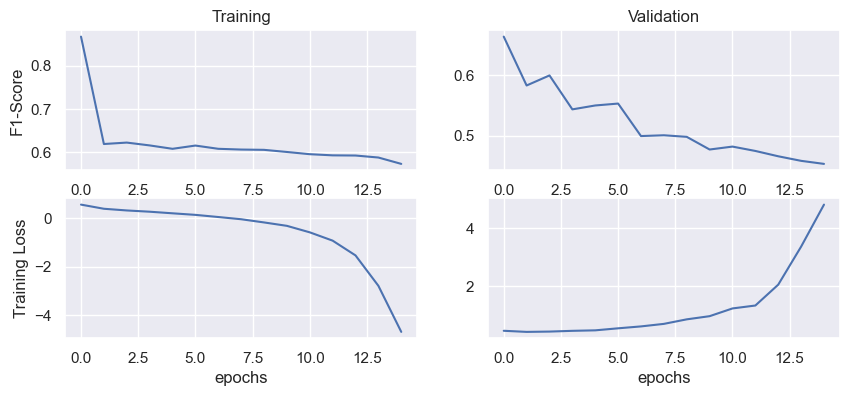

Average loss: 1.6745236754417419
Average F1-Score: 0.46859450340270997


In [27]:
# Adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/10.%20Keras%20Wide%20and%20Deep.ipynb

categorical_headers = list(X.select_dtypes(include='int64').columns)

fold_count=1
f1_average=0
loss_average=0

#plotting vars
plotfilename = "recreatewd_add_wide.png"
plotted = False

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
    # get crossed columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()
    
    # save categorical features
    X_train_cat = X_train[categorical_headers].to_numpy() 
    X_test_cat = X_test[categorical_headers].to_numpy() 
    
    # and save off the numeric features
    X_train_num =  X_train[numerical_headers].to_numpy()
    X_test_num = X_test[numerical_headers].to_numpy()
    
    #we need to create separate lists for each branch
    crossed_outputs = []

    #CROSSED DATA INPUT
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
    for idx, col in enumerate(cross_col_df_names):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_crossed, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        crossed_outputs.append(x)
    
    #now concatenate the outputs and add a fully connected layer
    wide_branch = concatenate(crossed_outputs, name='wide_concat')
    
    #reset this input branch
    all_deep_branch_outputs = []
    
    #CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx, col in enumerate(categorical_headers):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N,
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
    
    #NUMERIC DATA INPUT
    #create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=20, activation='relu', name='num_1')(input_num)
    
    all_deep_branch_outputs.append(x_dense)
    
    #merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
    #merge the deep and wide branch
    final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    
    model = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[f1])
    
    if(plotted == False):
        plot_model(
        model, to_file=plotfilename, show_shapes=True, show_layer_names=True,
        rankdir='LR', expand_nested=True)
        plotted = True
    
    
    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=([X_test_crossed,X_test_cat,X_test_num],y_test))
    
    loss, f1_score = model.evaluate([X_test_crossed,X_test_cat,X_test_num], y_test, verbose=0)
    
    print(f'Fold {fold_count} - Loss: {loss} F1-Score: {f1_score}')
    fold_count+=1
    f1_average+=f1_score
    loss_average+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['f1'])
    
    plt.ylabel('F1-Score')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_f1'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()
    
print(f'Average loss: {loss_average/5}')
print(f'Average F1-Score: {f1_average/5}')

## $b.$ Investigating generalization performance (2 pts)

## $c.$ Comparing wide and deep network to MLP (1 pt)

Fold X - Loss: 0.5129125118255615 F1-Score: 0.6286096572875977


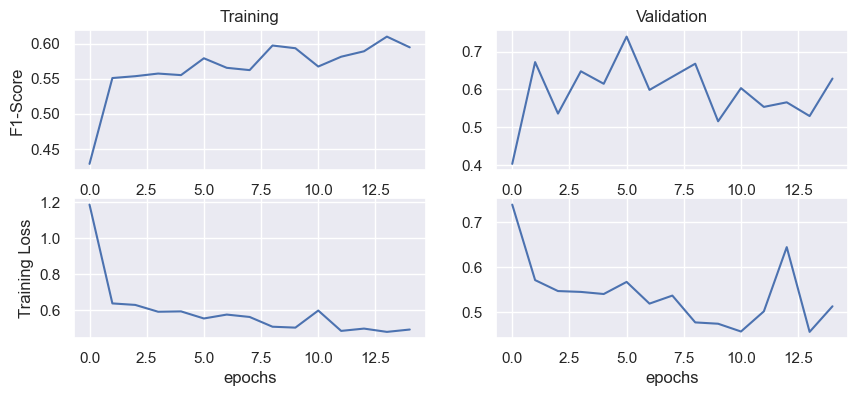

Fold X - Loss: 0.5305421948432922 F1-Score: 0.671747624874115


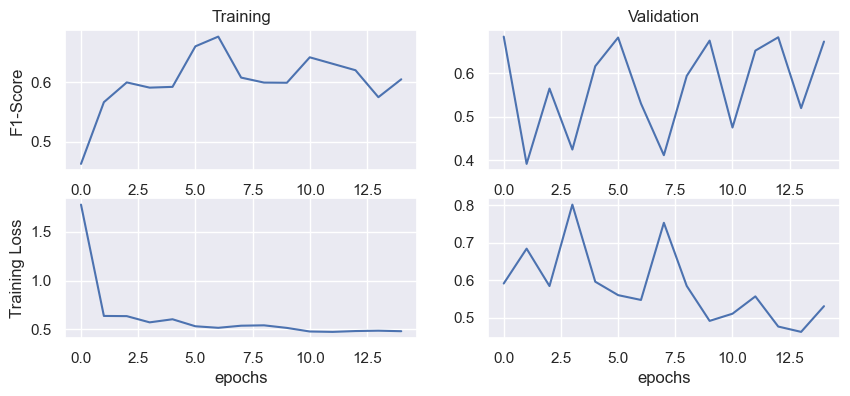

Fold X - Loss: 0.5487372875213623 F1-Score: 0.5638672709465027


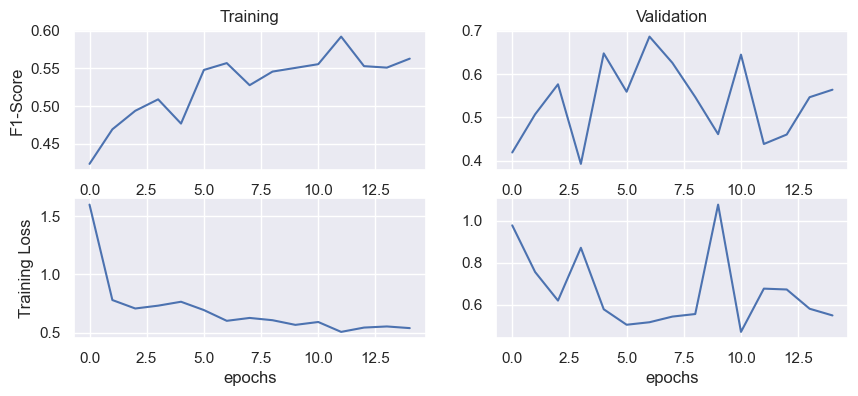

Fold X - Loss: 0.42332395911216736 F1-Score: 0.6796355247497559


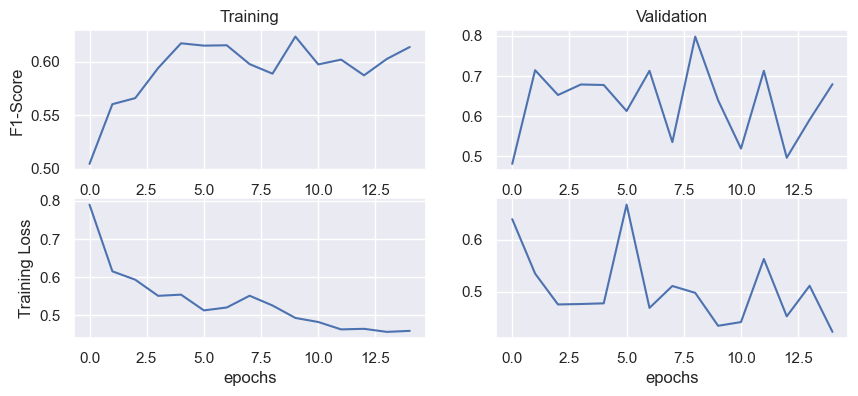

Fold X - Loss: 0.4463181495666504 F1-Score: 0.604129433631897


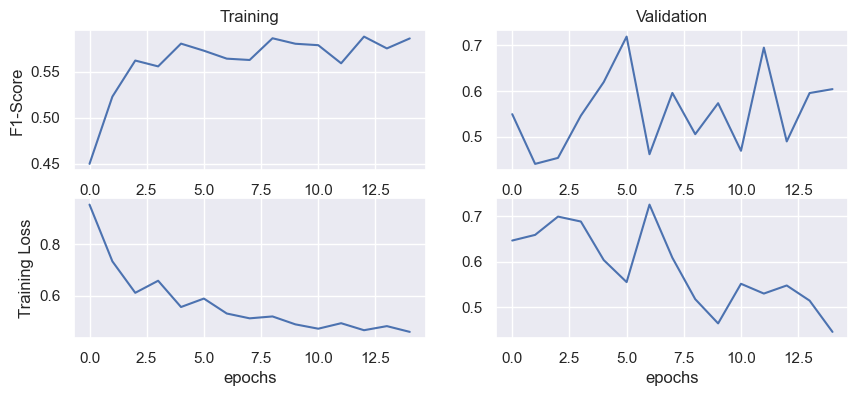

In [26]:
#3 layer mlp

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
 
    mlp_input = Input(shape=(X_train.shape[1],), name='input')
    x = Dense(units=25, activation='relu')(mlp_input)
    x = Dense(units=25, activation='relu')(x)
    x = Dense(units=25, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=mlp_input, outputs=predictions)
    
    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[f1])
    
    history = model.fit(X_train,
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=(X_test,y_test))
    
    loss, f1_score = model.evaluate(X_test, y_test, verbose=0)
    
    print(f'Fold X - Loss: {loss} F1-Score: {f1_score}')
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['f1'])
    
    plt.ylabel('F1-Score')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_f1'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()